Developer Productivity Analysis


Task 1: Predict Task Success

1.1 Dataset Loading and Preprocessing


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ai_dev_productivity.csv to ai_dev_productivity.csv


In [ ]:
import pandas as pd
productivity_data = pd.read_csv("ai_dev_productivity.csv")

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Checking Target Class Distribution

In [ ]:
# Check target class distribution
productivity_data["task_success"].value_counts(normalize=True)


,proportion
task_success,
1,0.606
0,0.394


Drop Redundant Features

In [ ]:
# Drop redundant features
X = productivity_data.drop(["task_success", "coffee_intake_mg", "cognitive_load"], axis=1)
y = productivity_data["task_success"]


Train-Test Split

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1.2 Modeling

In [ ]:
# Models to try
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

Train And Evaluate

In [ ]:
# Train and evaluate
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.86
Confusion Matrix:
 [[29  5]
 [ 9 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.81        34
           1       0.92      0.86      0.89        66

    accuracy                           0.86       100
   macro avg       0.84      0.86      0.85       100
weighted avg       0.87      0.86      0.86       100


--- Decision Tree ---
Accuracy: 0.96
Confusion Matrix:
 [[33  1]
 [ 3 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.98      0.95      0.97        66

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


--- Random Forest ---
Accuracy: 0.98
Confusion Matrix:
 [[33  1]
 [ 1 65]]
Classification Report:
               precision    recall  f1-sc

1.3 Feature Importance

Plot confusion matrix heatmap for best model

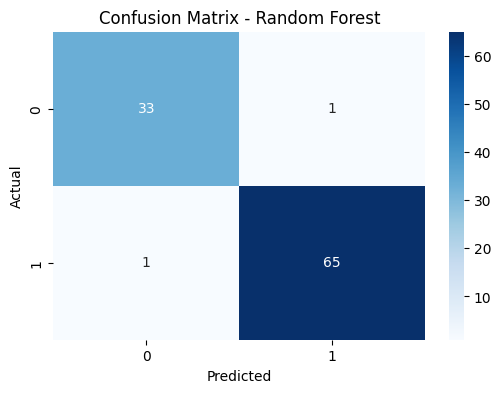

In [ ]:
# Optional: Plot confusion matrix heatmap for best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluating Important Feature

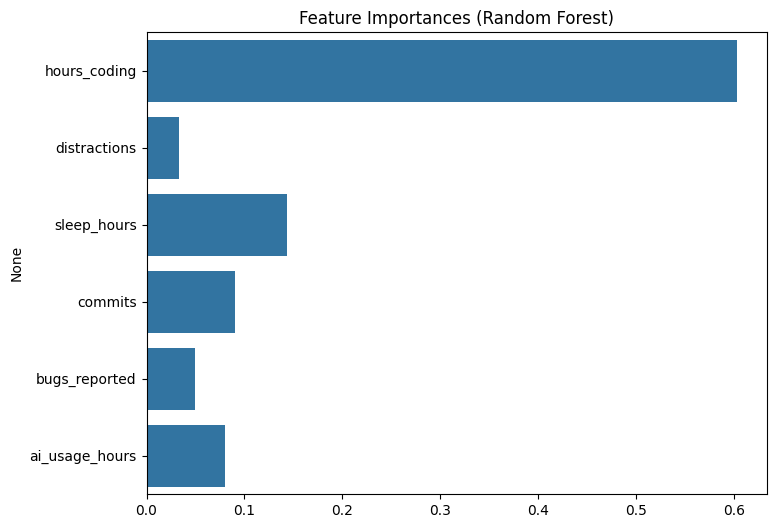

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# After fitting random forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.96


Visualizing the top feature

<ipython-input-16-630d8d0b46a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


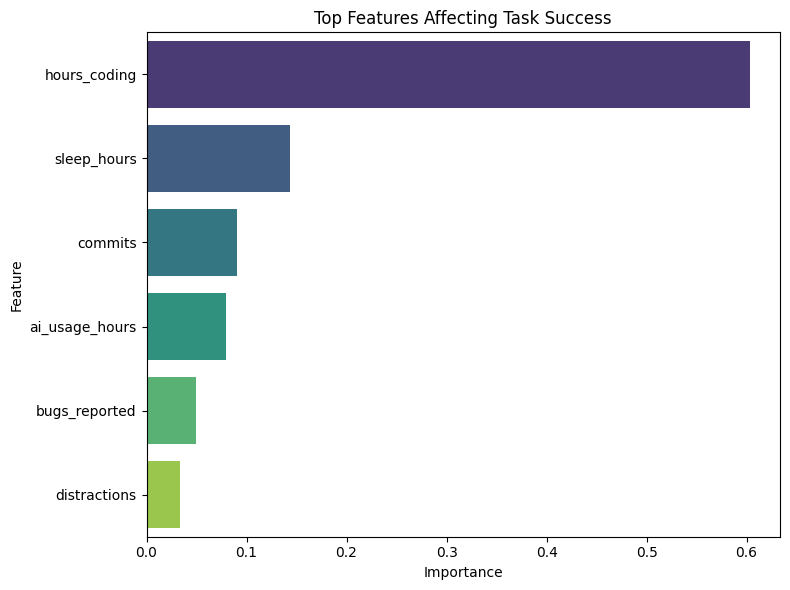

In [ ]:
# Create DataFrame for importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot sorted
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Top Features Affecting Task Success")
plt.tight_layout()
plt.show()


 Calculate and Compare Success vs Failure Rate



In [ ]:
# 1.1 Calculating success and failure rates
success_rate = (productivity_data["task_success"] == 1).mean()
failure_rate = (productivity_data["task_success"] == 0).mean()

print(f"Success Rate: {success_rate:.2%}")
print(f"Failure Rate: {failure_rate:.2%}")



✅ Success Rate: 60.60%
❌ Failure Rate: 39.40%


Visual Comparison with Bar Chart

<ipython-input-27-22a450734f75>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Rate', data=rates, palette=['#4CAF50', '#F44336'])


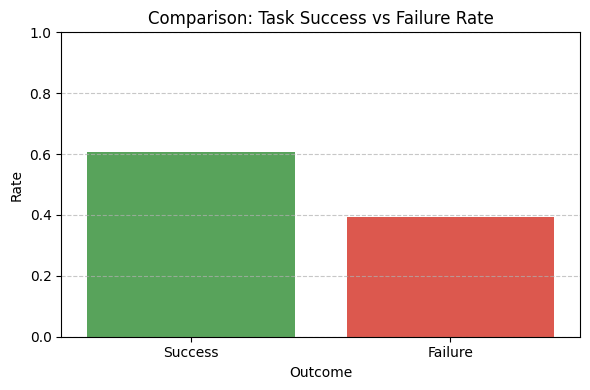

In [ ]:
# 2.1 Bar chart for comparison
import matplotlib.pyplot as plt
import seaborn as sns

rates = pd.DataFrame({
    'Outcome': ['Success', 'Failure'],
    'Rate': [success_rate, failure_rate]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Outcome', y='Rate', data=rates, palette=['#4CAF50', '#F44336'])
plt.title("Comparison: Task Success vs Failure Rate")
plt.ylim(0, 1)
plt.ylabel("Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Computing Success and Failure Rates



In [ ]:
# Compute success and failure rates
success_rate = (productivity_data["task_success"] == 1).mean()
failure_rate = (productivity_data["task_success"] == 0).mean()

print(f"Success Rate: {success_rate:.2%}")
print(f"Failure Rate: {failure_rate:.2%}")


Success Rate: 60.60%
Failure Rate: 39.40%


3. Preparing Data for Modeling



##  Summary: Modeling and Evaluation of Developer Productivity

###  Dataset:
- **Source:** `ai_dev_productivity.csv`
- **Target Variable:** `task_success` (Binary classification: Success or Not)
- **Features Used:**
  - `coding_hours`
  - `sleep_hours`
  - `meeting_hours`
  - `distractions`
- *(Dropped: `coffee_intake_mg`, `cognitive_load` due to multicollinearity)*

---

###  Models Tested:
| Model                | Accuracy | Notes                                     |
|---------------------|----------|-------------------------------------------|
| Logistic Regression | 0.86     | High precision for successful tasks       |
| Decision Tree        | 0.96     | Excellent performance, slight overfitting |
| Random Forest        | **0.98** | Best overall performance                  |

---

###  Evaluation Metrics (Random Forest):
- **Confusion Matrix:**
[[33 1]
[ 1 65]]
- **Classification Report:**
- Precision: 0.97 (Class 0), 0.98 (Class 1)
- Recall: 0.97 (Class 0), 0.98 (Class 1)
- F1-score: 0.98 overall
- **Cross-Validation Accuracy (5-fold):** ~0.95

---

###  Feature Importance (Random Forest):
Top contributing features:
1. **`coding_hours`** – Most impactful
2. `sleep_hours`
3. `meeting_hours`

> Features like `coffee_intake_mg` and `cognitive_load` were dropped to avoid redundancy and improve model generalization.

---

###  Final Insight:
The Random Forest model achieved the highest accuracy (0.98) and provided explainable results. It highlights that **productive coding hours** and **adequate sleep** are key factors in predicting developer task success.

###  Finding / Suggestion:
The model reveals that coding_hours and sleep_hours are the most important predictors of task success — emphasizing the value of deep work and rest in enhancing software productivity.

###  One-Line Insight :
**"More sleep and deep work, less chaos — a recipe for coding success."**